## 통계의 목표

-   하나의 샘플을 모집단을 뽑고, 중복을 허용해 똑같은 통계량을 계산.
-   이 기법을 resampling이라고 하고, 대표적인 resampling 기법으로 bootstrap 기법이 있다.

## bootstrap vs 모집단

-   부트스래핑으로 그래프 그려보면 정규분포와 상당히 유사하다.
-   이론적으로는 중심극한정리(CLT)에 의해 성립.
-   vec[1] ⇒ 10000번 반복해서 나온 것.

## 부트스트래핑의 장점

-   정규분포를 응용해 여러 통계량을 구할 수 있다.
-   ex) mean, 중위수, 분산, 신뢰구간 등등…

## 만들고 비교해보기

### 준비과정

-   시드 값은 101
-   추출횟수 x = 7, 벡터의 크기 n = 1000
-   1번째 벡터 = original
-   2번째 벡터 = bootstrap


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
# 시드 설정
np.random.seed(101)

# 설정값
x = 7  # 추출 횟수
n = 1000  # 벡터의 크기

# 빈 벡터 제작
original = np.empty(n)
bootstrap = np.empty(n)

### 추출 및 삽입과정

-   `for` 문을 사용한다.
-   original = 반복할 때마다 모집단에서 n번 추출. `data_A` 사용
-   sample = 모집단 추출 1번. 내부 복원 n번 추출. `data_B` 사용
-   모집단 추출은 균등분포 사용
-   내부 추출은 `sample.int(추출횟수, replace=T)` 로 사용

In [9]:
# original: 반복할 때마다 모집단에서 추출
for i in range(n):  # for문 시작 숫자를 0으로 변경
    data_A = np.random.uniform(size=x)
    original[i] = np.std(data_A, ddof=1)

# sample: 모집단 추출 1번. 이후 내부에서 추출
data_B = np.random.uniform(size=x)
for i in range(n):  # for문 시작 숫자를 0으로 변경
    sample = np.random.choice(data_B, size=x, replace=True)
    bootstrap[i] = np.std(sample, ddof=1)

### 결과 비교하기

> summary, 그래프, 사분위수 비교하기

Original summary:
Mean: 0.2828667097661486
Standard Deviation: 0.06153078064247175
Minimum: 0.09338097764272095
Maximum: 0.4707897062786775
25th Percentile: 0.2406239145593981
Median: 0.2890175615482009
75th Percentile: 0.32588522266129116

Bootstrap summary:
Mean: 0.2568843950694085
Standard Deviation: 0.08711786230817335
Minimum: 0.0625340057073444
Maximum: 0.43729900757691637
25th Percentile: 0.1676651748598566
Median: 0.2855101879650683
75th Percentile: 0.31455074391253385


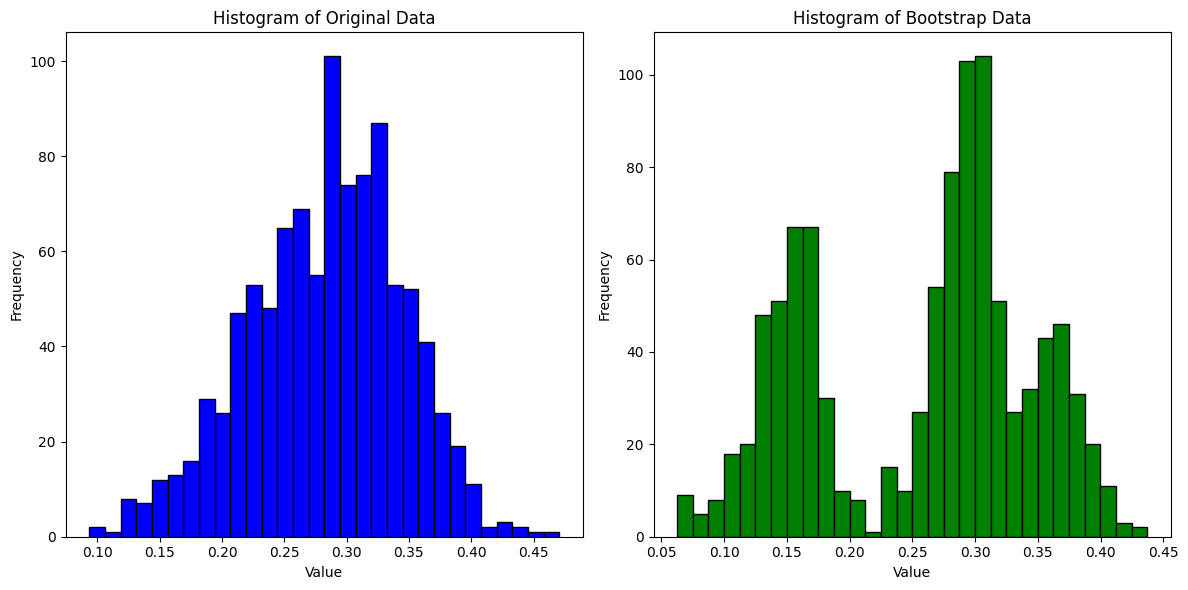


Original Data Quantiles (2.5%, 97.5%): [0.15238256 0.39078113]
Bootstrap Data Quantiles (2.5%, 97.5%): [0.10271335 0.39214007]


In [10]:
# 데이터 요약
print("Original summary:")
print("Mean:", np.mean(original))
print("Standard Deviation:", np.std(original, ddof=1))
print("Minimum:", np.min(original))
print("Maximum:", np.max(original))
print("25th Percentile:", np.percentile(original, 25))
print("Median:", np.median(original))
print("75th Percentile:", np.percentile(original, 75))

print("\nBootstrap summary:")
print("Mean:", np.mean(bootstrap))
print("Standard Deviation:", np.std(bootstrap, ddof=1))
print("Minimum:", np.min(bootstrap))
print("Maximum:", np.max(bootstrap))
print("25th Percentile:", np.percentile(bootstrap, 25))
print("Median:", np.median(bootstrap))
print("75th Percentile:", np.percentile(bootstrap, 75))

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 원본 데이터의 히스토그램
axes[0].hist(original, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Original Data')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# 부트스트랩 데이터의 히스토그램
axes[1].hist(bootstrap, bins=30, color='green', edgecolor='black')
axes[1].set_title('Histogram of Bootstrap Data')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 사분위수 비교하기
original_quantiles = np.percentile(original, [2.5, 97.5])
bootstrap_quantiles = np.percentile(bootstrap, [2.5, 97.5])

print("\nOriginal Data Quantiles (2.5%, 97.5%):", original_quantiles)
print("Bootstrap Data Quantiles (2.5%, 97.5%):", bootstrap_quantiles)

### 신뢰구간 구하기

In [11]:
# 평균과 표준편차 계산
mean_data_A = np.mean(data_A)
std_dev_data_A = np.std(data_A, ddof=1)  # 표본 표준편차

# 샘플 크기
x = len(data_A)

# 95% 신뢰구간 계산
z_critical = stats.norm.ppf(0.975)  # 95% 신뢰수준에 대한 z-값
margin_of_error = z_critical * (std_dev_data_A / np.sqrt(x))

lower_bound = mean_data_A - margin_of_error
upper_bound = mean_data_A + margin_of_error

print(f"95% 신뢰구간: ({lower_bound}, {upper_bound})")

95% 신뢰구간: (0.2989756760211939, 0.6557396901740521)
